In [1]:
import os
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [8]:
#path = 'C:\\Pythontest Anaconda\\Statquest\\projects\\wine\\'
#ROOT_DIR = os.path.realpath(os.path.join(os.path.dirname(__file__), '..', ))

currPath = os.path.abspath('')
ROOT_DIR = os.path.realpath(os.path.join(currPath, '..', ))


df_data_raw = pd.read_csv(ROOT_DIR + '\\00_data\\' + 'wine.data')
#df_names = pd.read_csv(path + '00_data\\' + 'wine.names')
names = ['WineClass',
         'Alcohol'
 	, 'Malic acid'
 	, 'Ash'
	, 'Alcalinity of ash'
 	, 'Magnesium'
	, 'Total phenols'
 	, 'Flavanoids'
 	, 'Nonflavanoid phenols'
 	, 'Proanthocyanins'
	,'Color intensity'
 	,'Hue'
 	,'OD/OD of diluted wines'
 	,'Proline']

df_data_raw.columns = names

In [10]:
###Check missing --> Seems no missing
###Create dummies --> Not necessary, no categorical variables, all float

###Split into X and y
X = df_data_raw.drop(columns = 'WineClass')
y = df_data_raw['WineClass']

###Split X into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
###First model: Random Forest Classifier

clf_rf = RandomForestClassifier(max_depth=2, random_state = 42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

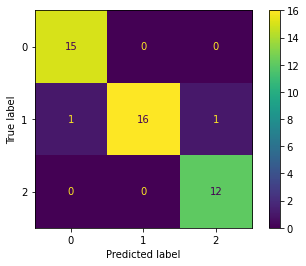

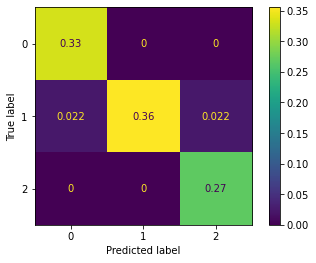

In [12]:
###Confusionmatrix for Test Set Predictions

predictions = clf_rf.predict(X_test)

#Confusion Matrix: Absolute Values
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

#Confusion Matrix: Relative Values
cm = confusion_matrix(y_test, predictions, normalize = 'all')
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [ ]:
#Evaluation: Prediction is quite good out of the box --> Likely the dataset is not challenging




#Evaluation

In [9]:
df_data_raw

,WineClass,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD/OD of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
